In [9]:
import seaborn as sns
%pylab inline
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
bank = pd.read_csv('~/data/bank/bank-additional-full.csv', sep=';')

In [3]:
bank.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
bank.drop('duration', axis = 1, inplace = True)

In [7]:

# first LR drop the col pdays for 
bankDrop = bank.drop('pdays', axis = 1)
bankDrop['y'] = map(lambda x: 1 if x == 'yes' else 0, bankDrop['y'])

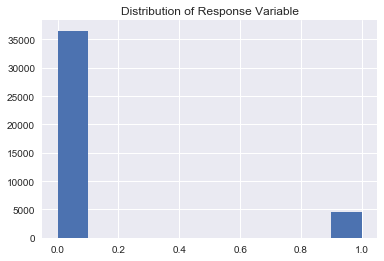

In [10]:

plt.hist(bankDrop['y'])
plt.title("Distribution of Response Variable")

In [11]:

# recode categorical variable
from sklearn.preprocessing import OneHotEncoder  # recode categorical variable
bankDrop = pd.get_dummies(bankDrop)

#split the data set into train and test at 80/20
import sklearn
import sklearn.cross_validation
train, test = sklearn.cross_validation.train_test_split(bankDrop, train_size = 0.8)
# varify the train and test
print (len(train.index))   # 32950
print (len(test.index))   #8238



32950
8238


/Users/Drake/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [13]:

# data prepare
# from sklearn
from sklearn import linear_model
logit = linear_model.LogisticRegression()      # get the 1 or 0 directly 
# check the params first
logit.get_params()
# Fit a Logistic linear model
logit.set_params(C=1e4)   ##n C is the regulation, too big, no regulation
#logReg.set_params(C=1e2)  # c reduced by 100 times but not much improvement
#logReg.set_params(C=1)    #  c = 1 the minmum point for the paramenter
# get the feature matrix and response series
x_tm = train.ix[:, train.columns != 'y']

y_tm = train['y']

/Users/Drake/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:13: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


In [15]:
logit.fit(x_tm, y_tm)
logit.score(x_tm,y_tm)

0.89720789074355078

In [16]:
tt = logit.predict(x_tm)
ConDF = pd.DataFrame({'TValue':y_tm,'Predict':tt })  # combining true and predict values
ContDCrossTabOnTrain = pd.crosstab(ConDF.Predict >0, ConDF.TValue >0)

In [17]:
# details of the results
x_test = test.ix[:, test.columns != 'y']
y_test = test['y']
print (logit.score(x_test,y_test))
tt = logit.predict(x_test)
ConDF = pd.DataFrame({'TValue':y_test,'Predict':tt })  # combining true and predict values
ContDCrossTabOnTest = pd.crosstab(ConDF.Predict >0, ConDF.TValue >0)

0.895969895606


/Users/Drake/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  from ipykernel import kernelapp as app


In [35]:

X = pd.read_csv('~/projects/capstone/model_selection/pro3_Data.csv')
y = pd.read_csv('~/projects/capstone/model_selection/pro3_y.csv', header= None)
y= y[0]

In [34]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, learning_curve, validation_curve, ShuffleSplit, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from IPython.display import display
import sklearn.cross_validation as cv

In [36]:
X_train, X_test, y_train, y_test= sklearn.model_selection.train_test_split(X, y)

In [37]:
from sklearn import linear_model
logReg = linear_model.LogisticRegression() 

In [40]:
from __future__ import print_function
import sklearn.metrics
import time

def evaluate_model(clf):
    """Scores a model using log loss with the created train and test sets."""
    start = time.time()
    clf.fit(X_train, y_train)
    train_loss = sklearn.metrics.log_loss(y_train, clf.predict_proba(X_train))
    test_loss = sklearn.metrics.log_loss(y_test, clf.predict_proba(X_test))
    print("Train score:", train_loss)
    print("Test score:", test_loss)
    print("Total time:", time.time() - start)
    print()
    return test_loss

In [41]:
# evaluate 1 model
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
evaluate_model(logit)

Train score: 0.206182039884
Test score: 0.213101070561
Total time: 0.439363956451



0.21310107056121008

/Users/Drake/anaconda/lib/python2.7/site-packages/sklearn/learning_curve.py:23: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


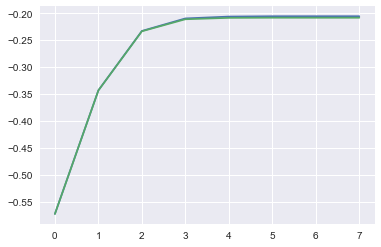

In [42]:
# evaluate for varying values of C. Plot training curves
import sklearn.learning_curve

C_values = [0.00001, 0.0001, 0.001, 0.01,0.1,1,10,100]

train_scores, test_scores = sklearn.learning_curve.validation_curve(
    LogisticRegression(), X_train, y_train, 'C', C_values, scoring='neg_log_loss')
plt.plot(np.mean(train_scores, axis=1), label='Train')
plt.plot(np.mean(test_scores, axis=1), label='Test')

In [43]:
# Grid search: try 8 different possibilities
from sklearn.model_selection import GridSearchCV

params = {'C' : [0.1,1], 'penalty': ['l1', 'l2'], 
          'class_weight':[None, 'balanced'] }
grid = GridSearchCV(LogisticRegression(), params, scoring='neg_log_loss')
evaluate_model(grid)
grid.cv_results_

Train score: 0.206192913053
Test score: 0.213030761267
Total time: 38.6068000793



{'mean_fit_time': array([ 0.8678894 ,  0.20170363,  1.05319071,  0.19978102,  4.41958968,
         0.29825536,  2.05812033,  0.2722617 ]),
 'mean_score_time': array([ 0.00727693,  0.00925406,  0.00705536,  0.00707833,  0.0076553 ,
         0.00905037,  0.00677498,  0.00734425]),
 'mean_test_score': array([-0.20851161, -0.20869698, -0.36550098, -0.36502194, -0.20835957,
        -0.20841975, -0.36525002, -0.36518411]),
 'mean_train_score': array([-0.20686282, -0.20635098, -0.36291309, -0.36233205, -0.20575379,
        -0.20574409, -0.36238533, -0.36230804]),
 'param_C': masked_array(data = [0.1 0.1 0.1 0.1 1 1 1 1],
              mask = [False False False False False False False False],
        fill_value = ?),
 'param_class_weight': masked_array(data = [None None 'balanced' 'balanced' None None 'balanced' 'balanced'],
              mask = [False False False False False False False False],
        fill_value = ?),
 'param_penalty': masked_array(data = ['l1' 'l2' 'l1' 'l2' 'l1' 'l2' 'l1' 

In [45]:
best_grid =grid.best_estimator_

In [46]:
best_grid

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [63]:
X_train, X_test, y_train, y_test= sklearn.model_selection.train_test_split(X, y)

In [47]:
evaluate_model(best_grid)

Train score: 0.206192956649
Test score: 0.213032329258
Total time: 10.8547568321



0.21303232925784155

In [64]:
best_grid.fit(X_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Logit_classification reports: 

In [65]:
from sklearn.metrics import classification_report
grid_pred_train= best_grid.predict(X_train)
target_names = ['class No','class Yes']
print (classification_report(y_train, grid_pred_train, target_names = target_names))

             precision    recall  f1-score   support

   class No       0.93      0.97      0.95     27439
  class Yes       0.67      0.42      0.52      3452

avg / total       0.90      0.91      0.90     30891



In [66]:
grid_pred_Test = best_grid.predict(X_test)
target_names =  ['class No','class Yes']
print (classification_report(y_test, grid_pred_Test, target_names = target_names))

             precision    recall  f1-score   support

   class No       0.93      0.97      0.95      9109
  class Yes       0.67      0.41      0.51      1188

avg / total       0.90      0.91      0.90     10297



In [ ]:
#Notebook out of order, another model below, but will use the above 'Logit_classification report'

### fren full_model

In [53]:
njobs = 4
randomState = 0
lr = LogisticRegression(random_state = randomState)
train_sizes, train_scores, test_scores = learning_curve(estimator = lr, 
                                                        X = X, 
                                                        y = y,
                                                        train_sizes = np.linspace(start = 0.1, stop = 1.0, num = 10), 
                                                        cv = ShuffleSplit(n_splits = 5, 
                                                                          test_size = 0.25, 
                                                                          random_state = randomState), 
                                                        n_jobs = njobs)

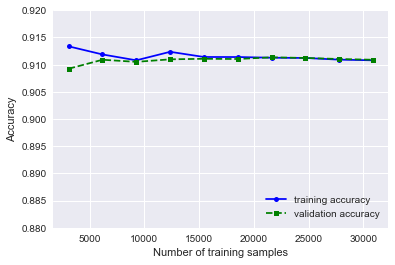

In [54]:
# Plot learning curve
train_means = np.mean(train_scores, axis = 1)
test_means = np.mean(test_scores, axis = 1)

plt.plot(train_sizes, train_means, color = "blue", marker = "o", markersize = 5, label = "training accuracy")
plt.plot(train_sizes, test_means, color = "green", linestyle = "--", marker = "s", markersize = 5, label = "test accuracy")
plt.xlabel("Number of training samples")
plt.ylabel("Accuracy")
plt.legend(loc = "lower right")
plt.ylim([0.88, 0.92])
plt.show()

In [56]:
print(test_means[8])

0.911042051083


In [57]:
# Plotting accuracy as a function of the model parameter C
param_range = [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]
train_scores, test_scores = validation_curve(estimator = lr, 
                                             X = X, 
                                             y = y,
                                             param_name = "C", 
                                             param_range = param_range, 
                                             cv = ShuffleSplit(n_splits = 5, 
                                                               test_size = 0.25, 
                                                               random_state = randomState), 
                                             n_jobs = njobs)

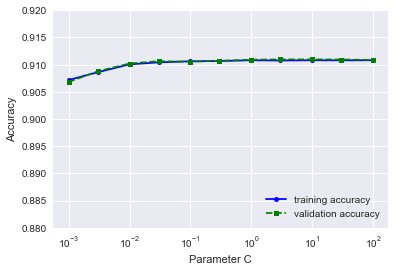

In [58]:
train_means = np.mean(train_scores, axis = 1)
test_means = np.mean(test_scores, axis = 1)

plt.plot(param_range, train_means, color = "blue", marker = "o", markersize = 5, label = "training accuracy")
plt.plot(param_range, test_means, color = "green", linestyle = "--", marker = "s", markersize = 5, label = "validation accuracy")
plt.xscale("log")
plt.xlabel("Parameter C")
plt.ylabel("Accuracy")
plt.legend(loc = "lower right")
plt.ylim([0.88, 0.92])
plt.show()

In [59]:
print(np.mean(test_scores, axis = 1))

[ 0.90682723  0.90876954  0.91020686  0.91063417  0.91053705  0.91071186
  0.91090609  0.91096436  0.91096436  0.91094494  0.91086724]


In [60]:
#validation accuracy with updated parameter
lr = LogisticRegression(random_state = randomState, C = 3)
scores = cross_val_score(estimator = lr, 
                         X = X, 
                         y = y, 
                         cv = ShuffleSplit(n_splits = 5, 
                                           test_size = 0.25, 
                                           random_state = randomState), 
                         n_jobs = njobs)
print("Accuracy : " + str(np.mean(scores)))

Accuracy : 0.910964358551


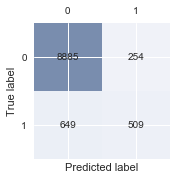

In [61]:
# Plotting the confusion matrix
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = randomState)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
confmat = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize = (2.5, 2.5))
ax.matshow(confmat, cmap = plt.cm.Blues, alpha = 0.5)
for i in range(confmat.shape[0]) :
    for j in range(confmat.shape[1]) : 
        ax.text(x = j, y = i, s = confmat[i, j], va = "center", ha = "center")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

In [ ]:
print("Our errors are mostly false positives (649 out of 903)")

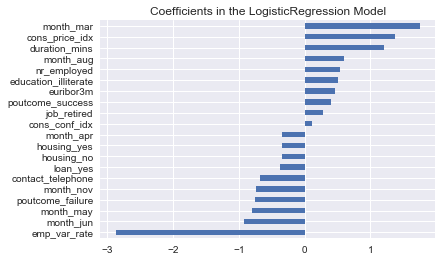

In [62]:
# Get the coefficients to see the most important features
coefs = pd.Series(lr.coef_[0], index = X_train.columns)
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the LogisticRegression Model")

## Logit_classification reports:

In [ ]:
from sklearn.metrics import classification_report
lr_pred_train= best_grid.predict(X_train)
target_names = ['class No','class Yes']
print (classification_report(logit_pred_train, target_names = target_names))